# Twitter Sentiment Analysis Project

## Overview

The goal of this project is to build a machine learning model to analyze tweets that can predict people's sentiments.

## Business Problem

Apple company hired a data scientist to build a machine learning model that can predict customers' sentiments towards their products and their competitors' products. The algorithm will predict whether a customer is happy or not and identify how the company can do better. 

## Data Understanding




In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nltk 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier




In [2]:
# #To display full output in Jupyter notebook, not only last result without using the print function
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
!ls data/

glove.6B.50d.txt
glove.twitter.27B.200d.txt
judge-1377884607_tweet_product_company.csv


In [4]:
# read in the data
df =pd.read_csv("data/judge-1377884607_tweet_product_company.csv",encoding="'ISO-8859-1'")
df.head()
# encoding type from: https://stackoverflow.com/questions/21504319/python-3-csv-file-giving-unicodedecodeerror-utf-8-codec-cant-decode-byte-err

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [5]:
# get some stat and info about the data
df.shape
df.describe()# checking some stat
df.info() #check type of data and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
# rename the columns 
df = df.rename(columns={"tweet_text":"tweet","emotion_in_tweet_is_directed_at":"product",
                        "is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"})
df.tail()

,tweet,product,sentiment
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,NaN,No emotion toward brand or product


## Scrub the data

In [7]:
df.isna().sum() #check for any missing value 

tweet           1
product      5802
sentiment       0
dtype: int64

In [8]:
# drop the null in Tweet
df= df.dropna(subset= ["tweet"])

In [9]:
# sanity check
df["tweet"].isna().sum()

0

In [10]:
# check for duplicate tweet
df["tweet"].duplicated().any()

True

In [11]:
#drop duplicated tweet
df.drop_duplicates(subset= ["tweet"],keep='first',inplace=True)

In [12]:
# drop the null in product
df= df.dropna(subset= ["product"])

In [13]:
df= df.reset_index(drop=True)

In [14]:
df.head(40)

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
6,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
7,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
8,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,Android App,Positive emotion


In [15]:
# check the shape of the current df
df.shape

(3280, 3)

## Explore the data

In [16]:
# check the target value count
df['sentiment'].value_counts(normalize =True)

Positive emotion                      0.811585
Negative emotion                      0.157927
No emotion toward brand or product    0.027744
I can't tell                          0.002744
Name: sentiment, dtype: float64

In [17]:
# rename the name of sentiment to a better one
emotion = {"No emotion toward brand or product": "neutral",
            "Positive emotion": "positive",
            "Negative emotion": "negative",
            "I can't tell": "unknown"}
df["sentiment"] = df["sentiment"].map(emotion)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

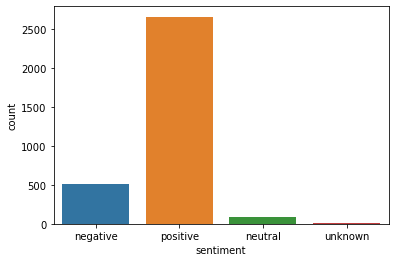

In [18]:
sns.countplot(df["sentiment"])

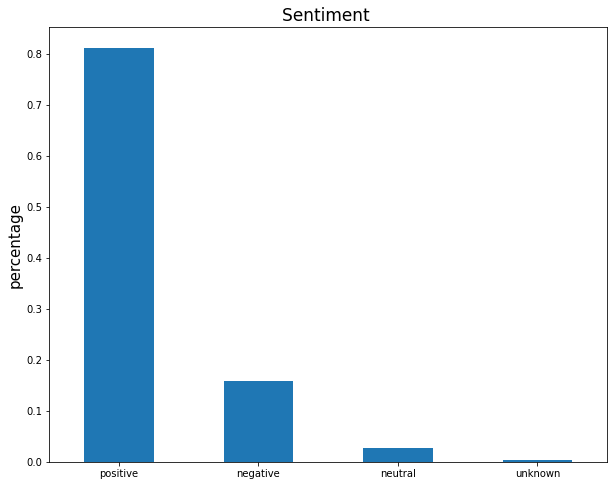

In [19]:
# plot the different types of sentiment
df["sentiment"].value_counts(normalize =True).plot(kind="bar",figsize=(10,8));
plt.title("Sentiment ", fontsize=17)
plt.ylabel("percentage",fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [20]:
# drop the small percentage of unknown sentiment, it doesn't add up any value to the data
# drop the small percentage of neutral sentiment, i will add it later to different notebook
df.drop(df[df['sentiment'] == "unknown"].index, inplace = True)
df.drop(df[df['sentiment'] == "neutral"].index, inplace = True)

In [21]:
# sanity check
df['sentiment'].value_counts(normalize =True)

positive    0.837107
negative    0.162893
Name: sentiment, dtype: float64

In [22]:
# check the value count of each product
df['product'].value_counts(normalize =True)

iPad                               0.287736
Apple                              0.200000
iPad or iPhone App                 0.144340
Google                             0.129560
iPhone                             0.089937
Other Google product or service    0.088994
Android App                        0.024843
Android                            0.023899
Other Apple product or service     0.010692
Name: product, dtype: float64

In [23]:
# separate the products into apple or google
company_product = {"iPad": "apple",
            "Apple": "apple",
            "iPad or iPhone App": "apple",
           "Google": "google",
            "iPhone": "apple",
            "Other Google product or service": "google",
            "Android App": "google",
            "Android": "google",
            "Other Apple product or service": "apple"}
df["product"] = df["product"].map(company_product)

In [24]:
# sanity check
df['product'].value_counts(normalize =True)

apple     0.732704
google    0.267296
Name: product, dtype: float64

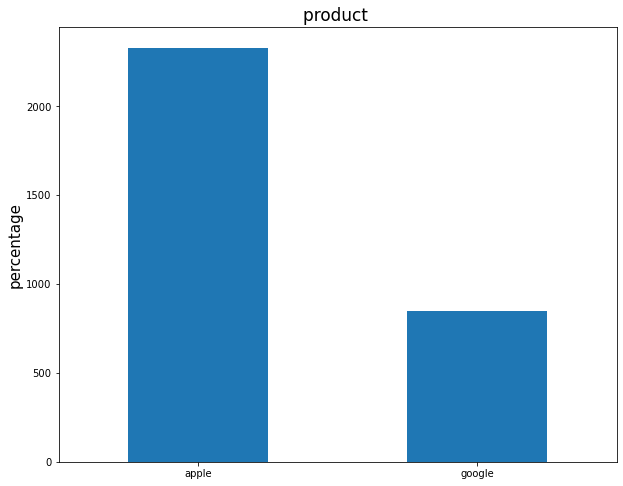

In [25]:
# plot the different types of sentiment
df["product"].value_counts().plot(kind="bar",figsize=(10,8));
plt.title("product ", fontsize=17)
plt.ylabel("percentage",fontsize=15)
plt.xticks(rotation=0)
plt.show()

(array([0, 1]), [Text(0, 0, 'apple'), Text(1, 0, 'google')])

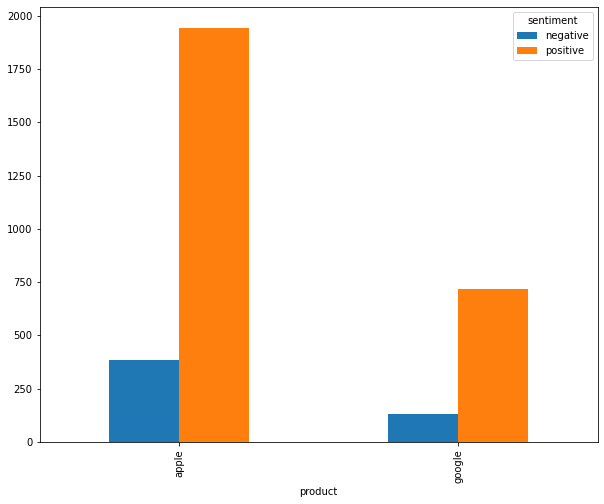

In [26]:
# Plot Sentiment by product without normalization
df.groupby(["product", "sentiment"]).size().unstack().plot(kind='bar', figsize=(10,8))
plt.xticks(rotation=90)

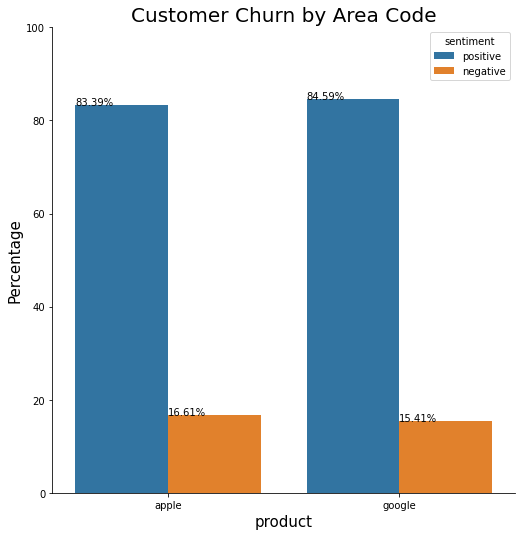

In [27]:
# Plot Sentiment by product  with normalization
x,y = "product", "sentiment"

df2 = df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('Percentage').reset_index()


g = sns.catplot(x=x,y='Percentage',hue=y,kind='bar',data=df2,legend_out=False,height=7, aspect=1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xlabel('product', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.title('Customer Churn by Area Code', fontsize=20)
plt.show()    
#after normalize the value counts of the area code, it is clear that the churn rate is almost the same in all areas.
# so area code doesn't have any significant effect on the customer churn

In [28]:
# add addtional columns to the data which is the length of the tweet
df['length']= df['tweet']. apply(len)

In [29]:
df.head()

,tweet,product,sentiment,length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,negative,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,positive,139
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,positive,79
3,@sxsw I hope this year's festival isn't as cra...,apple,negative,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,positive,131


<AxesSubplot:ylabel='Frequency'>

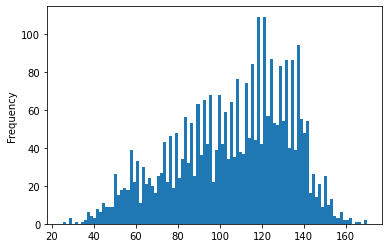

In [30]:
# plot the length of the tweet
df['length'].plot(bins=100, kind='hist') 
#the avarage length of the tweet between 90 to 110, min around 25, max around 175


In [31]:
# stat about the length of the tweet
df.describe()

,length
count,3180.000000
mean,106.075786
std,27.275111
min,25.000000
25%,87.000000
50%,110.500000
75%,128.000000
max,170.000000


In [32]:
# check shortest tweet 
df[df['length'] == 25]['tweet'].iloc[0]

'@mention #SXSW iPad rocks'

In [33]:
# check longest tweet 
df[df['length'] == 170]['tweet'].iloc[0]

'RT @mention HUZZAH!  RT @mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW. #umassjour'

In [34]:
# check the avarage tweet
df[df['length'] == 110]['tweet'].iloc[0]

'this will be fun to watch. #ipadmadness RT @mention Apple Opening Pop-Up Store In Austin For SXSW {link} #sxsw'

In [35]:
# convert the sentiment to 0 for negative and 1 for positive
target_map = {'negative': 0,
              'positive': 1}

df['sentiment'] = df['sentiment'].map(target_map)

In [36]:
negative = df[df['sentiment']==0]
negative

,tweet,product,sentiment,length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,0,127
3,@sxsw I hope this year's festival isn't as cra...,apple,0,82
14,I just noticed DST is coming this weekend. How...,apple,0,128
30,@mention - False Alarm: Google Circles Not Co...,google,0,119
39,attending @mention iPad design headaches #sxsw...,apple,0,53
...,...,...,...,...
3219,#iPad #news #apps not popular with the #kids. ...,apple,0,98
3221,Hmmm...Taxi Magic on iPhone does not appear to...,apple,0,83
3240,I think my effing hubby is in line for an #iPa...,apple,0,125
3250,I'm pretty sure the panelist that thinks &quot...,apple,0,112


In [37]:
positive = df[df['sentiment']==1]
positive

,tweet,product,sentiment,length
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,1,139
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,1,79
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,1,131
5,"#SXSW is just starting, #CTIA is around the co...",google,1,138
6,Beautifully smart and simple idea RT @madebyma...,apple,1,129
...,...,...,...,...
3274,@mention your iPhone 4 cases are Rad and Ready...,apple,1,109
3275,@mention your PR guy just convinced me to swit...,apple,1,96
3276,&quot;papyrus...sort of like the ipad&quot; - ...,apple,1,70
3278,I've always used Camera+ for my iPhone b/c it ...,apple,1,137


In [38]:
# in order to use wordcloud, convert the tweet to list and then join it as a string 
sentences = df['tweet'].tolist()
len(sentences)

3180

In [39]:
sentences_to_string = ''.join(sentences)

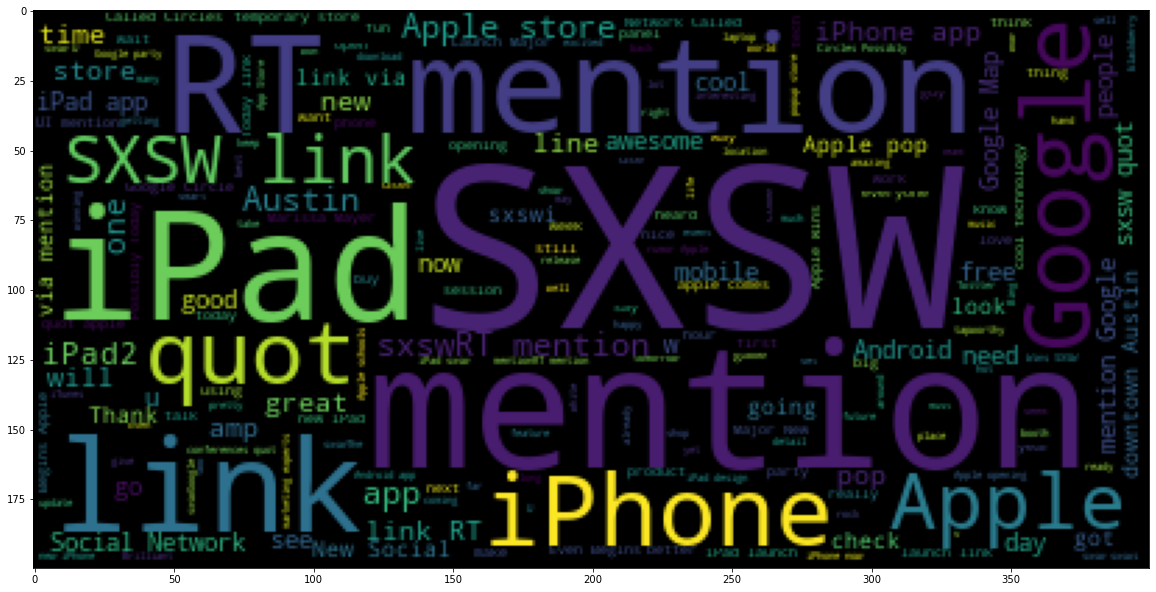

In [40]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_to_string))
# there is a lot of useless words, we should add it to the stop words

In [41]:
negative_list = negative['tweet'].tolist() 
negative_sentences_to_string = ''.join(negative_list)

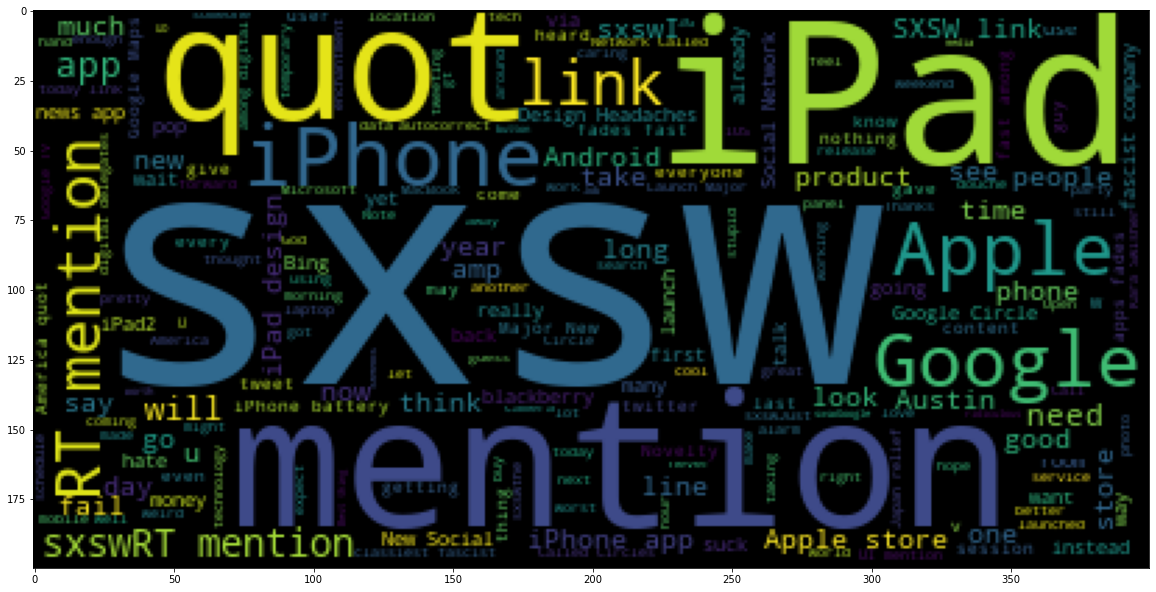

In [42]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_to_string))
# will get rid of useless word and redo the word cloud

In [43]:
df["tweet"].head(10)

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
5    #SXSW is just starting, #CTIA is around the co...
6    Beautifully smart and simple idea RT @madebyma...
7    Counting down the days to #sxsw plus strong Ca...
8    Excited to meet the @samsungmobileus at #sxsw ...
9    Find &amp; Start Impromptu Parties at #SXSW Wi...
Name: tweet, dtype: object

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
# [word for word in df['tweet'].split() if word.lower() not in stopwords.words('english')]
   

In [46]:
# df["tweet"] = [charec for charec in df["tweet"] if charec not in string.punctuation]
# df["tweet"]

In [47]:
#df.index.difference(df["tweet"].index)

In [48]:
df.head(40)

,tweet,product,sentiment,length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,apple,0,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,apple,1,139
2,@swonderlin Can not wait for #iPad 2 also. The...,apple,1,79
3,@sxsw I hope this year's festival isn't as cra...,apple,0,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,1,131
5,"#SXSW is just starting, #CTIA is around the co...",google,1,138
6,Beautifully smart and simple idea RT @madebyma...,apple,1,129
7,Counting down the days to #sxsw plus strong Ca...,apple,1,88
8,Excited to meet the @samsungmobileus at #sxsw ...,google,1,118
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,google,1,129


In [49]:
df["tweet"][5]


'#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan'

In [50]:
#df["tweet"].reindex(df["tweet"])


In [51]:
df["tweet"][0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [52]:
df['tweet'].unique()

array(['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
       "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
       '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
       ...,
       'Diller says Google TV &quot;might be run over by the PlayStation and the Xbox, which are essentially ready today.&quot; #sxsw #diller',
       "I've always used Camera+ for my iPhone b/c it has an image stabilizer mode. Suggestions for an iPad cam app w/ same feature? #SXSW #SXSWi",
       'Ipad everywhere. #SXSW {link}'], dtype=object)

In [53]:
# delet the las row from the df 
df = df.iloc[:-1 , :]

In [54]:
#df["tweet"]= df["tweet"].str.replace('.', '')

In [55]:
df["tweet"].tail()

3274    @mention your iPhone 4 cases are Rad and Ready...
3275    @mention your PR guy just convinced me to swit...
3276    &quot;papyrus...sort of like the ipad&quot; - ...
3277    Diller says Google TV &quot;might be run over ...
3278    I've always used Camera+ for my iPhone b/c it ...
Name: tweet, dtype: object

In [56]:
import nltk
nltk.download("stopwords")

# Make a list of stopwords to remove
from nltk.corpus import stopwords
import string
string.punctuation
# Preprocess reviews
stop_words = stopwords.words('english')
stop_words += list(string.punctuation)
stop_words += ['“','”','...','``',"''",'’',"httpst",'amp',"theto","}",
         "{",",",'rt', 'mention',"http:","https:", '@mention','link', 'quot', 'com', 'rt', 'sxsw', 'sxtx','2',
               'sxswrt','sxswi','quotgoogle','one','quotapple','iphone'] 

stop_words


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hudakassoumeh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
#df["tweet"]= [word for word in df['tweet'].split() if word.lower() not in stopwords.words('english')]

In [58]:
# # convert the tweet to string because it was giving me error
#df["tweet"] = str(df["tweet"])

In [59]:
# df["tweet"][6] 

In [60]:
# df["tweet"].isna().sum()

In [61]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'@[\w]*')
# df["tweet"] = df["tweet"].apply(nltk.word_tokenize)

In [62]:
# df["tweet"][0]

In [63]:
# tweets = tweet_tokenize(df["tweet"])
# words = [word_tokenize(tweet) for tweet in tweets]
# print(words)



In [64]:
# df["tweet"] = nltk.word_tokenize(df["tweet"])

In [65]:
# df["tweet"]

In [66]:
# import re
# for tweet in df["tweet"]:
#     re.sub(r'@[\w]*', '', tweet)
#     print(tweet)

In [67]:
# df["tweet"].head(10)

In [68]:
import re
# remove @user
df["tweet"] = df["tweet"].apply(lambda x:  re.sub(r'@[\w]*', '', x))

In [69]:
df["tweet"].head(10)

0    . I have a 3G iPhone. After 3 hrs tweeting at ...
1     Know about  ? Awesome iPad/iPhone app that yo...
2     Can not wait for #iPad 2 also. They should sa...
3     I hope this year's festival isn't as crashy a...
4     great stuff on Fri #SXSW: Marissa Mayer (Goog...
5    #SXSW is just starting, #CTIA is around the co...
6    Beautifully smart and simple idea RT   wrote a...
7    Counting down the days to #sxsw plus strong Ca...
8    Excited to meet the  at #sxsw so I can show th...
9    Find &amp; Start Impromptu Parties at #SXSW Wi...
Name: tweet, dtype: object

In [70]:
# remove special characters, numbers and punctuations
df["tweet"] = df["tweet"].apply(lambda x:  re.sub(r'^a-zA-Z#', '', x))


In [71]:
# # remove words shorter than 3 characters
#df["tweet"] = df["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [72]:
df["tweet"].head(10)

0    . I have a 3G iPhone. After 3 hrs tweeting at ...
1     Know about  ? Awesome iPad/iPhone app that yo...
2     Can not wait for #iPad 2 also. They should sa...
3     I hope this year's festival isn't as crashy a...
4     great stuff on Fri #SXSW: Marissa Mayer (Goog...
5    #SXSW is just starting, #CTIA is around the co...
6    Beautifully smart and simple idea RT   wrote a...
7    Counting down the days to #sxsw plus strong Ca...
8    Excited to meet the  at #sxsw so I can show th...
9    Find &amp; Start Impromptu Parties at #SXSW Wi...
Name: tweet, dtype: object

In [73]:
df.shape

(3179, 4)

In [74]:
df= df.reset_index(drop=True)

In [75]:
df.head(40)

,tweet,product,sentiment,length
0,. I have a 3G iPhone. After 3 hrs tweeting at ...,apple,0,127
1,Know about ? Awesome iPad/iPhone app that yo...,apple,1,139
2,Can not wait for #iPad 2 also. They should sa...,apple,1,79
3,I hope this year's festival isn't as crashy a...,apple,0,82
4,great stuff on Fri #SXSW: Marissa Mayer (Goog...,google,1,131
5,"#SXSW is just starting, #CTIA is around the co...",google,1,138
6,Beautifully smart and simple idea RT wrote a...,apple,1,129
7,Counting down the days to #sxsw plus strong Ca...,apple,1,88
8,Excited to meet the at #sxsw so I can show th...,google,1,118
9,Find &amp; Start Impromptu Parties at #SXSW Wi...,google,1,129


In [76]:
# # # remove words shorter than 3 characters and stopwords
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words if len(x)>3))
df['tweet'].head()

0    iPhone. After tweeting #RISE_Austin, dead! nee...
1    Know Awesome iPad/iPhone likely appreciate des...
2                    wait #iPad also. They sale #SXSW.
3    hope year's festival crashy year's iPhone app....
4    great stuff #SXSW: Marissa Mayer (Google), O'R...
Name: tweet, dtype: object

In [77]:
# tokenized the tweet
tokenized_tweet = df['tweet'].apply(lambda x: x.split())
tokenized_tweet.head(20)

0     [iPhone., After, tweeting, #RISE_Austin,, dead...
1     [Know, Awesome, iPad/iPhone, likely, appreciat...
2              [wait, #iPad, also., They, sale, #SXSW.]
3     [hope, year's, festival, crashy, year's, iPhon...
4     [great, stuff, #SXSW:, Marissa, Mayer, (Google...
5     [#SXSW, starting,, #CTIA, around, corner, #goo...
6     [Beautifully, smart, simple, idea, wrote, #hol...
7     [Counting, days, #sxsw, plus, strong, Canadian...
8     [Excited, meet, #sxsw, show, Sprint, Galaxy, s...
9     [Find, &amp;, Start, Impromptu, Parties, #SXSW...
10    [Foursquare, game,, time, #SXSW, http://j.mp/g...
11    [Gotta, love, #SXSW, Google, Calendar, featuri...
12     [Great, #sxsw, ipad, http://tinyurl.com/4nqv92l]
13    [haha,, awesomely, iPad, http://bit.ly/hTdFim,...
14    [noticed, coming, weekend., many, iPhone, user...
15    [Just, added, #SXSW, flights, Matching, people...
16    [Must, #SXSW, app!, Lovely, review, Forbes, SX...
17    [Need, iPad2, Austin, #sxsw., sure, I'll, 

In [78]:
# tokenized_tweet.head(20)

In [79]:
# df['tweet'] = tokenized_tweet.apply(lambda x: x.split())

In [80]:
# tokenized_tweet.dtypes


In [81]:
# from nltk.stem import WordNetLemmatizer 
# lemmatizer = WordNetLemmatizer()
# # we can also lemmatize our original reviews
# lemmatized_review=[]
# for w in tokenized_tweet:
#     lemmatized_review.append(lemmatizer.lemmatize(w))

# len(set(lemmatized_review))



In [82]:
# df['tweet'] = tokenized_tweet
# df.head(7)

In [83]:
# from nltk import WordNetLemmatizer 
# lemmatizer = WordNetLemmatizer()
# tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
# tokenized_tweet.head()

In [84]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [iphone., after, tweet, #rise_austin,, dead!, ...
1    [know, awesom, ipad/iphon, like, appreci, desi...
2             [wait, #ipad, also., they, sale, #sxsw.]
3    [hope, year', festiv, crashi, year', iphon, ap...
4    [great, stuff, #sxsw:, marissa, mayer, (google...
Name: tweet, dtype: object

In [85]:
# tokenized_tweet = tokenized_tweet.tolist() 
# df['tweet'] = ''.join(tokenized_tweet)

In [86]:
tokenized_tweet.head(40)

0     [iphone., after, tweet, #rise_austin,, dead!, ...
1     [know, awesom, ipad/iphon, like, appreci, desi...
2              [wait, #ipad, also., they, sale, #sxsw.]
3     [hope, year', festiv, crashi, year', iphon, ap...
4     [great, stuff, #sxsw:, marissa, mayer, (google...
5     [#sxsw, starting,, #ctia, around, corner, #goo...
6     [beauti, smart, simpl, idea, wrote, #hollergra...
7     [count, day, #sxsw, plu, strong, canadian, dol...
8     [excit, meet, #sxsw, show, sprint, galaxi, sti...
9     [find, &amp;, start, impromptu, parti, #sxsw, ...
10    [foursquar, game,, time, #sxsw, http://j.mp/gr...
11    [gotta, love, #sxsw, googl, calendar, featur, ...
12     [great, #sxsw, ipad, http://tinyurl.com/4nqv92l]
13    [haha,, awesom, ipad, http://bit.ly/htdfim, #h...
14    [notic, come, weekend., mani, iphon, user, hou...
15    [just, ad, #sxsw, flight, match, peopl, planes...
16    [must, #sxsw, app!, love, review, forb, sxsw, ...
17    [need, ipad2, austin, #sxsw., sure, i'll, 

In [87]:
# # combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = "".join(tokenized_tweet[i])


In [88]:
tokenized_tweet

0       iphone.aftertweet#rise_austin,dead!needupgrade...
1       knowawesomipad/iphonlikeapprecidesign.also,the...
2                            wait#ipadalso.theysale#sxsw.
3                hopeyear'festivcrashiyear'iphonapp.#sxsw
4       greatstuff#sxsw:marissamayer(google),o'reilli(...
                              ...                        
3174    iphoncaseready!stoptomorrowthem!#sxsw#zazzlesx...
3175    convincswitchbackiphone.great#sxswcoverage.#pr...
3176    &quot;papyrus...sortlikeipad&quot;nice!lol!#sx...
3177    dillersaygoogl&quot;mightplaystatxbox,essentir...
3178    i'valwayusecamera+iphonimagstabilmode.suggesti...
Name: tweet, Length: 3179, dtype: object

In [89]:
df['tweet'].dtypes

dtype('O')

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words= stop_words,lowercase=False)

vec_tweet = vectorizer.fit(tokenized_tweet)
vec_tweet= vec_tweet.transform(tokenized_tweet)
vec_tweet

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['http', 'https'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<3179x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4526 stored elements in Compressed Sparse Row format>

In [91]:
# vec_tweet.shape

In [92]:
#most frequent words overall
# freq_words = pd.Series(' '.join(df['tweet']).split()).value_counts()[:30]
# freq_words

In [93]:
# freqw = df['tweet'].tolist()
# len(freqw)
# freqw_to_string = ''.join(freqw)

In [94]:
# plt.figure(figsize=(20,20))
# plt.imshow(WordCloud().generate(freqw_to_string))

In [95]:
# import re
# for tweet in df["tweet"]:
#     print(tweet)
#     re.sub(r'<[^>]*>', '', tweet) 

In [96]:
# # tweet_free_punc = [charec for charec in df["tweet"] if charec not in stop_words]
# # tweet_free_punc
# import re
# df["tweet"] = df["tweet"].apply(lambda x:  re.sub(r'<[^>]*>', '', x))
# df["tweet"] = df["tweet"].apply(lambda x: ' '.join(
#     [word for word in x.split() if word.lower() not in (stop_words)]))

In [97]:
# # Preprocess our target
# target_map = {'negative': 0,
#               'positive': 1,
#              'neutral':2}

# df['sentiment'] = df['sentiment'].map(target_map)

In [98]:
# # feature extraction
# from sklearn.feature_extraction.text import CountVectorizer
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [99]:
# # Fit SMOTE to training data
#X_trains, y_trains = SMOTE().fit_resample(X_train, y_train)
# fit SMOTE here  to balance the target
# XGBoost not sensitive to standardization because it uses an ensemble algorithm comprised of decision trees

In [111]:
vec_tweet

<3179x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4526 stored elements in Compressed Sparse Row format>

In [112]:
# vec_tweet = df['tweet']

In [113]:
# Define our X and y
X = vec_tweet
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
#df['tweet']

In [116]:
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()
# nb.fit(X_train, y_train)

ValueError: could not convert string to float: "Sounds intriguing... Lots chatter around Google's social network, Circles #SXSW -KEK"

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
# # Predicting the Test set results
# y_predict_test = nb.predict(X_test)
# cm = confusion_matrix(y_test, y_predict_test)
# sns.heatmap(cm, annot=True)

In [ ]:
def evaluate(estimator, X_train, X_test, y_train, y_test, use_decision_function='yes'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    use_decision_function allows you to toggle whether you use decision_function or
    predict_proba in order to get the output needed for roc_auc_score
    If use_decision_function == 'skip', then it ignores calculating the roc_auc_score
    '''
    # grab predictions
    train_preds = estimator.predict(X_train)
    test_preds = estimator.predict(X_test)
    
    # output needed for roc_auc_score
    if use_decision_function == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif use_decision_function == 'yes': # not all classifiers have decision_function
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif use_decision_function == 'no':
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception ("The value for use_decision_function should be 'skip', 'yes' or 'no'.")

    print(type(test_out))
    
    # print scores
    print("Train Scores")
    print("------------")
    print(f"Recall: {recall_score(y_train, train_preds)}")
    print(f"Precision: {precision_score(y_train, train_preds)}")
    print(f"Accuracy: {accuracy_score(y_train, train_preds)}")
    print(f"F1 Score: {f1_score(y_train, train_preds)}")
    if type(train_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
    print("----" * 5)
    print("Test Scores")
    print("-----------")
    print(f"Recall: {recall_score(y_test, test_preds)}")
    print(f"Precision: {precision_score(y_test, test_preds)}")
    print(f"Accuracy: {accuracy_score(y_test, test_preds)}")
    print(f"F1 Score: {f1_score(y_test, test_preds)}")
    if type(test_out) == np.ndarray:
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")
    
    # plot test confusion matrix
    plot_confusion_matrix(estimator, X_test, y_test)
    plt.show()

In [ ]:
evaluate(nb, X_train, X_test, y_train, y_test, use_decision_function='skip')

In [ ]:
#evaluate(nb, X_train, X_test, training_preds,y_predict_test,use_decision_function='skip')

In [ ]:
# print(classification_report(y_test, y_predict_test))

In [ ]:
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

In [ ]:
evaluate(clf, X_train, X_test, y_train, y_test, use_decision_function='skip')

In [ ]:
 plot_confusion_matrix(clf, X_test, test_preds)

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

In [ ]:
plot_confusion_matrix(svc, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

In [ ]:
evaluate(forest, X_train, X_test, y_train,y_test,use_decision_function='skip')

In [ ]:
# Feature importance
forest.feature_importances_

In [ ]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [ ]:
plot_feature_importances(forest)

In [ ]:
# Evaluate
evaluate(clf, X_trains, X_test, training_preds,test_preds,use_decision_function='skip')
#There is a significant improvement in XGBoost Classifier after using SMOTE. The confusing matrix looks great
#with zero False Negative and False Positive. The testing score is perfect on all metrics. There is a clear 
#improvement from the previous XGBoost model.

In [ ]:
# Find our longest review for padding later
max_length = max([len(s.split()) for s in X_train])
max_length

In [ ]:
X_train

In [ ]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

# tokenized_review = tokenizer.tokenize(X_train)

In [ ]:
# Tokenize our text
from tensorflow import keras
from tensorflow.keras import layers

tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Defining our results visualization function
def visualize_training_results(history):
    '''
    From https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
    
    Input: keras history object (output from trained model)
    '''
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    fig.suptitle('Model Results')

    # summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_ylabel('Accuracy')
    ax1.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_ylabel('Loss')
    ax2.legend(['train', 'test'], loc='upper left')
    
    plt.xlabel('Epoch')
    plt.show()

In [ ]:
def create_embedding_matrix(glove_filepath, word_index, embedding_dim):
    '''
    Function from https://realpython.com/python-keras-text-classification/#using-pretrained-word-embeddings
    Grabs the embeddings just for the words in our vocabulary
    
    Inputs:
    glove_filepath - string, location of the glove text file to use
    word_index - word_index attribute from the keras tokenizer
    embedding_dim - int, number of dimensions to embed, a hyperparameter
    
    Output:
    embedding_matrix - numpy array of embeddings
    '''
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(glove_filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [ ]:
# Find our vocab_size to use as a param later
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

In [ ]:
# Padding our inputs so they're all the same length
X_train = keras.preprocessing.sequence.pad_sequences(
    X_train, maxlen=max_length, padding='post')
X_test = keras.preprocessing.sequence.pad_sequences(
    X_test, maxlen=max_length, padding='post')

In [ ]:
# glove = {}
# with open('data/glove.6B.50d.txt', 'rb') as f:
#     for line in f:
#         parts = line.split()
#         word = parts[0].decode('utf-8')
#         if word in total_vocabulary:
#             vector = np.array(parts[1:], dtype=np.float32)
#             glove[word] = vector

In [ ]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('data/glove.twitter.27B.200d.txt',
                                           tokenizer.word_index, 
                                           embedding_dim)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model = keras.models.Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=max_length,
                           trainable=True))
# Changing our previous simple dense layer to an LSTM
# Adding some dropout to prevent overfitting 
model.add(layers.LSTM(embedding_dim, 
                      dropout=0.2,
                      return_sequences=False))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=100,
                    validation_data=(X_test, y_test),
                    callbacks=es)
# This takes a decent amount of time if you don't enable Kaggle's GPUs to train on


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Visualize results
visualize_training_results(history)

In [ ]:
# tweet_free_punc_join = " ".join(tweet_free_punc)
# tweet_free_punc_join

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

tokenized_review = tokenizer.tokenize(df["tweet"])

In [ ]:
# add neutral sentiment to the target